In [1]:
w1 = [[1,1],[1,2],[1,4],[2,1],[3,1],[3,3]]
w2 = [[2,2],[3,2],[3,4],[5,1],[5,4],[5,5]]

In [2]:
import numpy as np
import pandas as pd
W = [[1,1,'w1'],[1,2,'w1'],[1,4,'w1'],[2,1,'w1'],[3,1,'w1'],[3,3,'w1'],[2,2,'w2'],[3,2,'w2'],[3,4,'w2'],[5,1,'w2'],[5,4,'w2'],[5,5,'w2']]
df = pd.DataFrame(W,columns = ['X1','X2','Class'])
df

,X1,X2,Class
0,1,1,w1
1,1,2,w1
2,1,4,w1
3,2,1,w1
4,3,1,w1
5,3,3,w1
6,2,2,w2
7,3,2,w2
8,3,4,w2
9,5,1,w2


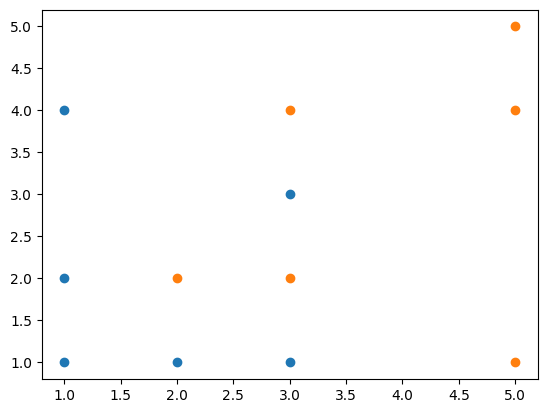

In [3]:
import matplotlib.pyplot as plt
x = df['X1'][0:6]
y = df['X2'][0:6]
plt.scatter(x, y)
u = df['X1'][6:12]
v = df['X2'][6:12]
plt.scatter(u,v)

In [4]:
sum1 = 0
for i in range(len(w1)):
    sum1 = sum1 + w1[i][0]
mean11 = sum1 / len(w1)

sum2 = 0
for j in range(len(w1)):
    sum2 = sum2 + w1[j][1]
mean12 = sum2/len(w1)
mean1 = [mean11,mean12]

In [5]:
mean1

[1.8333333333333333, 2.0]

In [6]:
sum3 = 0
for i in range(len(w2)):
    sum3 = sum3 + w2[i][0]
mean21 = sum3 / len(w2)

sum4 = 0
for j in range(len(w2)):
    sum4 = sum4 + w2[j][1]
mean22 = sum4/len(w2)
mean2 = [mean21,mean22]

In [7]:
mean2

[3.8333333333333335, 3.0]

In [8]:
import numpy as np
w11=[]
p=[]
#w1[0] - mean1
for i in range(len(w1)):
    a = w1[i][0] - mean1[0]
    b = w1[i][1] - mean1[1]
    w11.append([a,b])
w11

[[-0.8333333333333333, -1.0],
 [-0.8333333333333333, 0.0],
 [-0.8333333333333333, 2.0],
 [0.16666666666666674, -1.0],
 [1.1666666666666667, -1.0],
 [1.1666666666666667, 1.0]]

In [9]:
w21=[]
q=[]
#w1[0] - mean1
for i in range(len(w2)):
    a = w2[i][0] - mean2[0]
    b = w2[i][1] - mean2[1]
    w21.append([a,b])
w21

[[-1.8333333333333335, -1.0],
 [-0.8333333333333335, -1.0],
 [-0.8333333333333335, 1.0],
 [1.1666666666666665, -2.0],
 [1.1666666666666665, 1.0],
 [1.1666666666666665, 2.0]]

In [10]:
np.matrix(w11[0]).transpose()*np.matrix(w11[0])

matrix([[0.69444444, 0.83333333],
        [0.83333333, 1.        ]])

In [11]:
s11 = []
for i in range(len(w11)):
    s11.append(np.matrix(w11[i]).transpose()*np.matrix(w11[i]))
s11

[matrix([[0.69444444, 0.83333333],
         [0.83333333, 1.        ]]),
 matrix([[0.69444444, 0.        ],
         [0.        , 0.        ]]),
 matrix([[ 0.69444444, -1.66666667],
         [-1.66666667,  4.        ]]),
 matrix([[ 0.02777778, -0.16666667],
         [-0.16666667,  1.        ]]),
 matrix([[ 1.36111111, -1.16666667],
         [-1.16666667,  1.        ]]),
 matrix([[1.36111111, 1.16666667],
         [1.16666667, 1.        ]])]

In [12]:
s1 = 0
for i in range(len(s11)):
    s1 = s1 + s11[i]
s1

matrix([[ 4.83333333, -1.        ],
        [-1.        ,  8.        ]])

In [13]:
s22 = []
for i in range(len(w21)):
    s22.append(np.matrix(w21[i]).transpose()*np.matrix(w21[i]))
s22

[matrix([[3.36111111, 1.83333333],
         [1.83333333, 1.        ]]),
 matrix([[0.69444444, 0.83333333],
         [0.83333333, 1.        ]]),
 matrix([[ 0.69444444, -0.83333333],
         [-0.83333333,  1.        ]]),
 matrix([[ 1.36111111, -2.33333333],
         [-2.33333333,  4.        ]]),
 matrix([[1.36111111, 1.16666667],
         [1.16666667, 1.        ]]),
 matrix([[1.36111111, 2.33333333],
         [2.33333333, 4.        ]])]

In [14]:
s2 = 0
for i in range(len(s22)):
    s2 = s2 + s22[i]
s2

matrix([[ 8.83333333,  3.        ],
        [ 3.        , 12.        ]])

In [15]:
sw = s1 + s2

In [16]:
sw

matrix([[13.66666667,  2.        ],
        [ 2.        , 20.        ]])

In [17]:
W = np.linalg.inv(sw) * (np.matrix(np.matrix(mean1) - np.matrix(mean2))).transpose()

In [18]:
W

matrix([[-0.14108911],
        [-0.03589109]])

In [19]:
w1_projected=[]
for i in range(len(w1)):
    w1_projected.append((W.transpose()*np.matrix(w1[i]).transpose())[0])
w1_projected


[matrix([[-0.1769802]]),
 matrix([[-0.21287129]]),
 matrix([[-0.28465347]]),
 matrix([[-0.31806931]]),
 matrix([[-0.45915842]]),
 matrix([[-0.53094059]])]

In [20]:
w2_projected=[]
for j in range(len(w2)):
    w2_projected.append(W.transpose()*np.matrix(w2[j]).transpose())
w2_projected

[matrix([[-0.3539604]]),
 matrix([[-0.4950495]]),
 matrix([[-0.56683168]]),
 matrix([[-0.74133663]]),
 matrix([[-0.8490099]]),
 matrix([[-0.88490099]])]

In [21]:
sum_projected1 = 0
for i in range(len(w1_projected)):
    sum_projected1 = sum_projected1 + w1_projected[i]
mean1_projected = sum_projected1 / len(w1_projected)
mean1_projected

matrix([[-0.33044554]])

In [22]:
sum_projected2 = 0
for i in range(len(w2_projected)):
    sum_projected2 = sum_projected2 + w2_projected[i]
mean2_projected = sum_projected2 / len(w2_projected)
mean2_projected

matrix([[-0.64851485]])

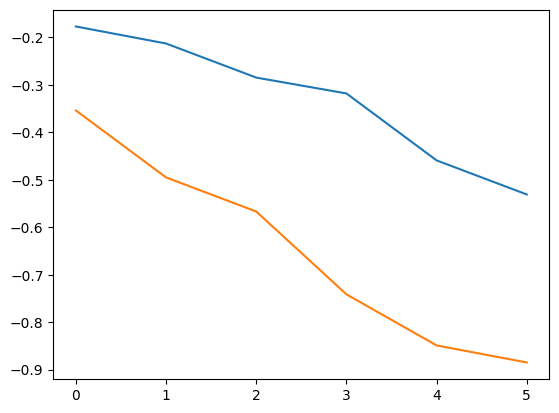

In [23]:
w1_projected = [-0.1769802,-0.21287129,-0.28465347,-0.31806931,-0.45915842,-0.53094059]
plt.plot(w1_projected)

w2_projected = [-0.3539604,-0.4950495,-0.56683168,-0.74133663,-0.8490099,-0.88490099]
plt.plot(w2_projected)

In [1]:
from sklearn.linear.model import Linear\ Discriminant\ analysis\ question\ 2.ipynbRegression

ModuleNotFoundError: No module named 'sklearn.linear'

In [2]:
import sklearn